In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

In [30]:
import numpy as np

from Utils import *
from constants import *

from Environment import *
from Non_Stationary_Environment import *

from Social_influence import *
from Network import Network

from Simulation import *

from Ecommerce import *
from Ecommerce3 import *
from Ecommerce4 import *
from Ecommerce5 import *
from Ecommerce6 import *

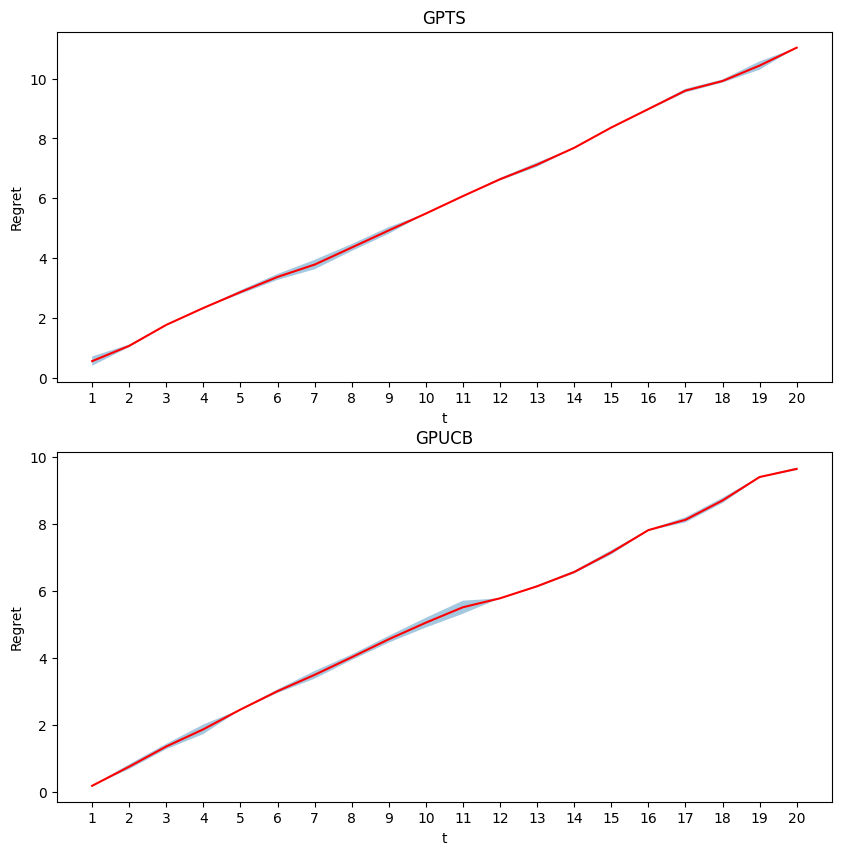

In [31]:
# -----------STEP 4------------
gpts_rewards_per_experiment = []
gpucb_rewards_per_experiment = []

opts = []

for e in tqdm(range(0, n_experiments), position=0, desc="n_experiment", leave=False):
    env, nodes_activation_probabilities, num_sold_items, observations_probabilities = generate_new_environment()

    ecomm4_gpts = Ecommerce4_GPTS(
        B_cap, budgets, product_prices)
    ecomm4_ucb = Ecommerce4_GPUCB(
        B_cap, budgets, product_prices)

    for t in tqdm(range(0, T), position=1, desc="n_iteration", leave=False):
        arm = ecomm4_ucb.pull_arm()
        reward, sold_items = env.round_step4(arm, num_sold_items)
        ecomm4_ucb.update(arm, reward, sold_items)

        arm = ecomm4_gpts.pull_arm()
        reward, sold_items = env.round_step4(arm, num_sold_items)
        ecomm4_gpts.update(arm, reward, sold_items)

    gpucb_rewards_per_experiment.append(ecomm4_ucb.collected_rewards)
    gpts_rewards_per_experiment.append(ecomm4_gpts.collected_rewards)

    opts.append(np.sum(env.get_users_alpha(), axis=0)[1:])


plot_regrets_step4(gpts_rewards_per_experiment,
                    gpucb_rewards_per_experiment, opts)